In [3]:
from tqdm import tqdm
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests, bs4
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process
#import networkx as nx
#from networkx.drawing.nx_agraph import graphviz_layout
import random
import warnings
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv("/Users/me/Desktop/Social Network/weight.csv",index_col=0)

In [5]:
df

,Source,Target,Weight
4,CUI YAN,DORRIETY DANIEL JAMES,54
16,PHELPS PETER DAVID,BODEN EUGENE PAULING,34
18,PHELPS PETER DAVID,FLOWERS LARRY IVIS,46
32,DICINTIO RICHARD MARTIN,STOIA LUCAS JOHN,76
36,MELTON PATRICK BENEDICT,WILLIS CHRISTOPHER PAUL,32
...,...,...,...
395234,YAMAMOTO KAZUO,HAMADA TOSHIYA,35
395235,YAMAMOTO KAZUO,TAKAHASHI KUNIAKI,35
395236,HAMADA TOSHIYA,TAKAHASHI KUNIAKI,33
395477,SHI RUNYU,CHINEN TORU,31


# NX


Network analysis must include at least: • Degree distribution analysis;
• Connected components analysis; • Path analysis;
• Clustering Coefficient, Density analysis;
• Centrality analysis.

In [ ]:
#UNDIRECTED

In [4]:
def plot_graph(G):
    nx.draw(G, with_labels=True)
    plt.show()

In [5]:
G=nx.Graph()
for _, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    
    G.add_node(source)
    G.add_node(target)
    
    G.add_edge(source, target, weight=weight)

In [95]:
print("Number of Nodes: ", G.order()) # equivalent to len(G) and G.number_of_nodes()
print("Number of Edges: ", G.number_of_edges())

Number of Nodes:  13619
Number of Edges:  46487


In [43]:
#Fino a qui ok

In [70]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

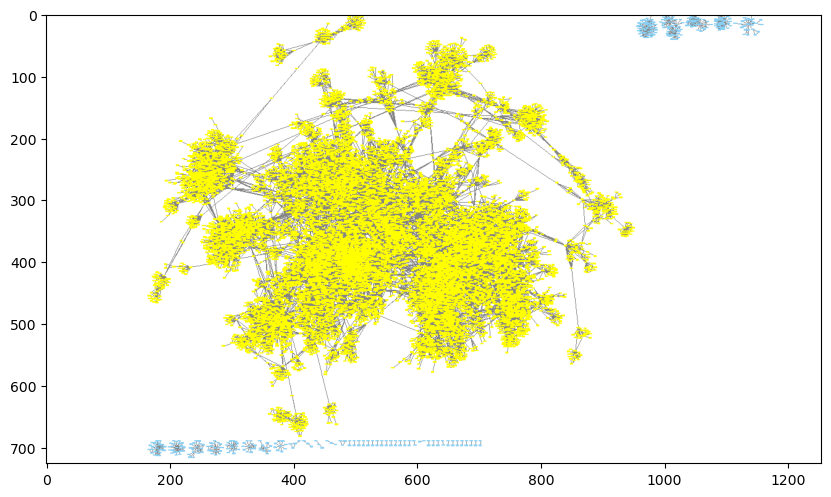

In [72]:
plt.subplots(figsize=(10, 10))
plt.imshow(mpimg.imread('/Users/giuseppepalminteri/Desktop/BREVETTI.png'))

# Giant Component # Da rivedere

In [18]:
components = nx.connected_components(G)
largest_component = max(components, key=len)
num_nodes = len(largest_component)
G0 = G.subgraph(largest_component)
num_edges = G0.number_of_edges()

In [19]:
print('The number of nodes of the Giant component is:',num_nodes)
print('The number of edges of the Giant component is:',num_edges)


The number of nodes of the Giant component is: 13237
The number of edges of the Giant component is: 45722


In [12]:
# Identifica le componenti connesse del grafo
#componenti = nx.connected_components(G)
#print("Componenti connesse:", list(componenti))

Componenti connesse: [{'ACKERMANN ROBERT ADOLPH', 'BILLECI MICHAEL', 'PIXTON MATTHEW ROBERT', 'SONG DONGWOO', 'SEXTON DANIEL WHITE', 'YAMAMOTO SHINICHI', 'DIAO XIAOXUE', 'TEEHAN SEAN', 'YEE SHARON LISA', 'OKABE REI', 'KRISHNAN SIDDARTH A', 'KANEKO MINEO', 'KUWABARA NOBUYUKI', 'RAHMAN MOJIBUR', 'MITSUNO MAKOTO', 'ARAYA KOTARO', 'MCMAHAN KEVIN W', 'HAYASHI TOSHIHIDE', 'YASUDA RYOUHEI', 'SCHEP CORNELIS MARINUS', 'KIKKAWA NORIFUMI', 'HIRASAWA KUNIO', 'TADOKORO HISAO', 'GORMAN MARK', 'NOMURA MASAHIDE', 'MUHAMMAD NABIL', 'LEE HAK-JU', 'KWON HWAN JOON', 'OZAWA KEN', 'BESSYO DAISUKE', 'IGARASHI SACHIKO', 'JOHNSTON BILL DAMON', 'NISHIMURA SADAO', 'OWADA NAOKO', 'TAKEUCHI TAKASHI', 'ARII YUSUKE', 'BASTIDE PAUL R', 'LOGHIN NABIL', 'KITAGAWA MASATOSHI', 'RASMUSSEN BRIAN', 'BARB KEVIN JOSEPH', 'FUKUDA TADAJI', 'MAKINO OSAMU', 'MISHIMA MOTOMICHI', 'FELLER JOHN A', 'OKADA HIDEO', 'BOJAPPA PARVAGADA GANAPATHY', 'MELTON PATRICK BENDICT', 'WADA KIYOSHI', 'SAITOH SEIICHI', 'WATANABE KATSUYUKI', 'KAWANO I

# Degree distribution

In [84]:
print(G.degree)#Undirected

[('HENDERSON BRIAN LESLIE', 7), ('CUI YAN', 51), ('DORRIETY DANIEL JAMES', 8), ('SHUBERT GARY CHARLES', 4), ('COOK PAUL ALBERT', 4), ('BRUNELLE DANIEL JOSEPH', 72), ('PHELPS PETER DAVID', 14), ('BODEN EUGENE PAULING', 66), ('NELSON MARK ERIK', 11), ('FLOWERS LARRY IVIS', 14), ('SYBERT PAUL DEAN', 14), ('DICINTIO RICHARD MARTIN', 14), ('MELTON PATRICK BENEDICT', 63), ('STOIA LUCAS JOHN', 50), ('WILLIS CHRISTOPHER PAUL', 8), ('PENTECOST RONNIE RAY', 10), ('DAVIS JR LEWIS BERKLEY', 29), ('DAY SCOTT ARTHUR', 6), ('JORDAN JR HAROLD LAMAR', 6), ('MORGAN REX ALLEN', 8), ('VYSOHLID MARTIN', 1), ('HOFER DOUGLAS CARL', 42), ('MONIZ THOMAS ORY', 48), ('ROSE JOSEPH GEORGE', 6), ('ORLANDO ROBERT JOSEPH', 26), ('KUSCH RUEDIGER SOEREN', 4), ('KING ROBERT DEAN', 42), ('STEIGERWALD ROBERT LOUIS', 4), ('KULKARNI AMBARISH JAYANT', 40), ('KESHAVAN HRISHIKESH', 27), ('DEDE MEHMET', 13), ('BEWLAY BERNARD PATRICK', 147), ('WANG GUANGHUA', 13), ('PRITCHARD BYRON', 17), ('IDELCHIK MICHAEL SOLOMON', 11), ('WEIM

In [20]:
degree_dict = dict(G.degree())

In [21]:
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

for node, degree in sorted_degree:
    print(f"Nodo: {node}, Grado: {degree}")

Nodo: SAKO YOICHIRO, Grado: 133
Nodo: CHENG KANGGUO, Grado: 129
Nodo: BEWLAY BERNARD PATRICK, Grado: 123
Nodo: KONDO TETSUJIRO, Grado: 118
Nodo: KUMAR AJITH KUTTANNAIR, Grado: 116
Nodo: SATO HIROSHI, Grado: 115
Nodo: TURNQUIST NORMAN ARNOLD, Grado: 101
Nodo: IKEDA MASAMI, Grado: 100
Nodo: MCCLOSKEY PATRICK JOSEPH, Grado: 95
Nodo: LEE CHING-PANG, Grado: 91
Nodo: SUGAMA SADAYUKI, Grado: 91
Nodo: ISHINAGA HIROYUKI, Grado: 89
Nodo: LEWIS LARRY NEIL, Grado: 87
Nodo: HERSHEY JOHN ERIK, Grado: 87
Nodo: KASHINO TOSHIO, Grado: 87
Nodo: YAMAMOTO AKIRA, Grado: 87
Nodo: KARITA SEIICHIRO, Grado: 85
Nodo: HIRABAYASHI HIROMITSU, Grado: 84
Nodo: GLYNN CHRISTOPHER CHARLES, Grado: 82
Nodo: KRAY NICHOLAS JOSEPH, Grado: 78
Nodo: KOTAKI YASUO, Grado: 78
Nodo: YANG CHIH-CHAO, Grado: 78
Nodo: BUNKER RONALD SCOTT, Grado: 77
Nodo: JACOBI CHRISTIAN, Grado: 76
Nodo: LEE JU-HO, Grado: 76
Nodo: NISHIMURA ASAO, Grado: 75
Nodo: DORIS BRUCE B, Grado: 75
Nodo: SADANA DEVENDRA K, Grado: 74
Nodo: TAJIKA HIROSHI, Grado: 

In [22]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]

kmin = min(degrees)
kmax = max(degrees)

In [23]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)
print()
print("Degree sequence: ", degrees)

Number of nodes:  13619
Number of edges:  46487

Average degree:  6.826786107643733
Average degree (alternate calculation) 6.826786107643733

Minimum degree:  1
Maximum degree:  133

Degree sequence:  [6, 41, 8, 4, 4, 58, 11, 52, 11, 11, 13, 11, 49, 42, 6, 7, 25, 5, 5, 5, 1, 38, 39, 5, 20, 2, 35, 2, 33, 22, 11, 123, 12, 13, 11, 31, 5, 10, 14, 116, 8, 44, 1, 23, 7, 46, 9, 5, 18, 52, 5, 27, 31, 34, 3, 2, 34, 5, 13, 4, 3, 45, 2, 57, 5, 2, 6, 52, 3, 46, 15, 26, 8, 4, 31, 27, 11, 6, 48, 24, 17, 13, 11, 53, 95, 10, 42, 58, 87, 1, 1, 47, 35, 13, 48, 8, 40, 42, 12, 23, 27, 63, 11, 2, 68, 6, 18, 33, 18, 10, 15, 15, 19, 15, 11, 13, 22, 5, 5, 58, 8, 56, 1, 63, 2, 5, 9, 7, 3, 3, 91, 7, 2, 40, 29, 10, 39, 8, 26, 59, 2, 2, 2, 5, 64, 2, 2, 1, 1, 46, 14, 8, 6, 50, 4, 15, 4, 33, 8, 2, 4, 7, 4, 4, 3, 3, 11, 4, 9, 4, 11, 101, 5, 20, 55, 4, 13, 7, 8, 87, 23, 8, 6, 8, 5, 10, 4, 4, 2, 3, 17, 17, 13, 13, 5, 2, 65, 17, 1, 11, 19, 30, 15, 4, 2, 78, 1, 2, 12, 17, 19, 48, 70, 19, 63, 13, 7, 23, 5, 1, 77, 65, 11,

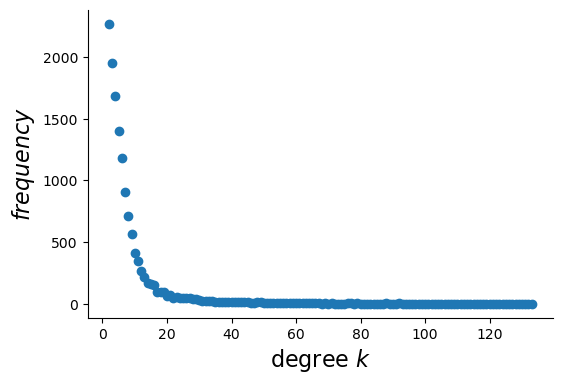

In [107]:
bin_edges = np.linspace(kmin, kmax, num=kmax-kmin+1)


density, _ = np.histogram(degrees, bins=kmax-kmin, density=False)

fig = plt.figure(figsize=(6,4))


x = bin_edges[kmin:kmax+1]
plt.plot(x, density, marker='o', linestyle='none')


plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$frequency$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

In [109]:
# using the force-based or "spring" layout algorithm
#fig = plt.figure(figsize=(8,8))
#nx.draw_spring(G, node_size=40)

KeyboardInterrupt: 

<Figure size 800x800 with 0 Axes>

In [108]:

degree_centrality = nx.degree_centrality(G)
print("Centralità di grado:", degree_centrality)


closeness_centrality = nx.closeness_centrality(G)
print("Centralità di vicinanza:", closeness_centrality)


betweenness_centrality = nx.betweenness_centrality(G)
print("Centralità di intermediazione:", betweenness_centrality)

Centralità di grado: {'HENDERSON BRIAN LESLIE': 0.000440593332354237, 'CUI YAN': 0.0030107211044206198, 'DORRIETY DANIEL JAMES': 0.000587457776472316, 'SHUBERT GARY CHARLES': 0.000293728888236158, 'COOK PAUL ALBERT': 0.000293728888236158, 'BRUNELLE DANIEL JOSEPH': 0.004259068879424291, 'PHELPS PETER DAVID': 0.0008077544426494345, 'BODEN EUGENE PAULING': 0.003818475547070054, 'NELSON MARK ERIK': 0.0008077544426494345, 'FLOWERS LARRY IVIS': 0.0008077544426494345, 'SYBERT PAUL DEAN': 0.0009546188867675135, 'DICINTIO RICHARD MARTIN': 0.0008077544426494345, 'MELTON PATRICK BENEDICT': 0.0035981788808929355, 'STOIA LUCAS JOHN': 0.003084153326479659, 'WILLIS CHRISTOPHER PAUL': 0.000440593332354237, 'PENTECOST RONNIE RAY': 0.0005140255544132766, 'DAVIS JR LEWIS BERKLEY': 0.0018358055514759875, 'DAY SCOTT ARTHUR': 0.0003671611102951975, 'JORDAN JR HAROLD LAMAR': 0.0003671611102951975, 'MORGAN REX ALLEN': 0.0003671611102951975, 'VYSOHLID MARTIN': 7.34322220590395e-05, 'HOFER DOUGLAS CARL': 0.0027

KeyboardInterrupt: 

In [ ]:
degree_dist = nx.degree_histogram(G)
print("Distribuzione di grado: ", degree_dist)

### Plot it in log scale

logarithmically-spaced bins between the minimum and maximum degree

In [111]:
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=50)

density, _ = np.histogram(degrees, bins=bin_edges, density=True)

# `_` indicates that `np.histogram()` is returning a tuple of two items, and we don't care about
# what's in the second element. what is the other thing it's returning? check the docs:
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

In [112]:
bin_edges

array([  1.        ,   1.10495327,   1.22092173,   1.34906145,
         1.49064986,   1.64709844,   1.8199668 ,   2.01097827,
         2.22203701,   2.45524706,   2.71293326,   2.99766448,
         3.31227916,   3.65991369,   4.04403359,   4.46846814,
         4.93744848,   5.45564983,   6.02823812,   6.66092141,
         7.36000689,   8.13246367,   8.98599232,   9.92910158,
        10.97119325,  12.12265585,  13.3949682 ,  14.8008139 ,
        16.3542077 ,  18.07063526,  19.9672075 ,  22.0628312 ,
        24.37839745,  26.93698995,  29.7641151 ,  32.88795628,
        36.33965479,  40.15362035,  44.36787407,  49.02442748,
        54.1697014 ,  59.85498863,  66.13696534,  73.07825605,
        80.7480579 ,  89.22283053,  98.58705825, 108.93409228,
       120.36708135, 133.        ])

In [113]:
density

array([1.58882456e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.49600652e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.93489692e-01,
       0.00000000e+00, 2.67809576e-01, 0.00000000e+00, 0.00000000e+00,
       1.67909236e-01, 1.16054211e-01, 0.00000000e+00, 7.43631467e-02,
       5.38968829e-02, 0.00000000e+00, 3.17652978e-02, 2.43090480e-02,
       3.09276331e-02, 9.92634765e-03, 8.46120346e-03, 1.17226256e-02,
       8.25632178e-03, 2.55522605e-03, 6.02656613e-03, 3.07587939e-03,
       2.49673765e-03, 2.64917055e-03, 1.57485523e-03, 1.57417729e-03,
       1.03961317e-03, 8.71172397e-04, 7.72656160e-04, 4.28121989e-04,
       3.74541863e-04, 2.22081335e-04, 9.52044079e-05, 8.61614790e-05,
       6.93133217e-05, 2.35236153e-05, 1.41928267e-05, 1.92670953e-05,
       1.74370228e-05])

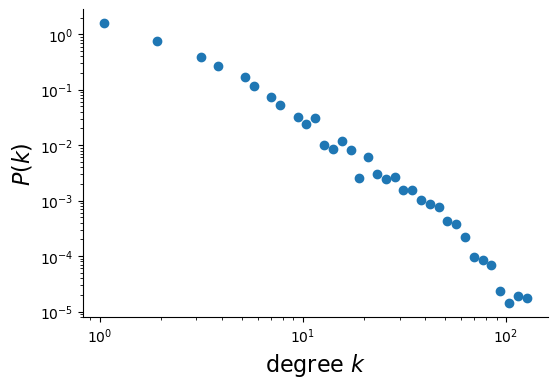

In [114]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

### Plot it in linear scale

In [115]:
# Get num equally spaced bins between kmin and kmax
# Take care, the number of bins matters to avoid the curve up and down
bin_edges = np.linspace(kmin, kmax, num=30)

density, _ = np.histogram(degrees, bins=bin_edges, density=True)

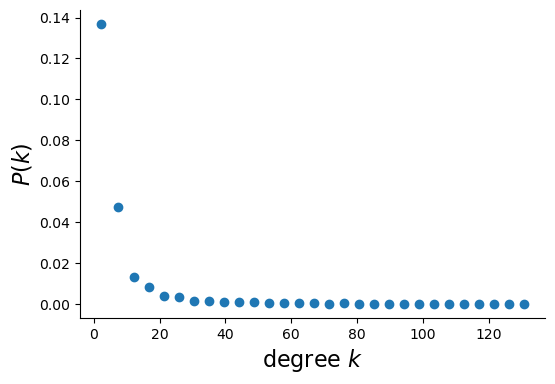

In [116]:
fig = plt.figure(figsize=(6,4))

# "x" is in the midpoint of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

# Different Plots

In [ ]:
# using the fcircular layout algorithm
#fig = plt.figure(figsize=(8,8))
#nx.draw_circular(G, node_size=40)

In [ ]:
# using the force-based or "spring" layout algorithm
#fig = plt.figure(figsize=(8,8))
#nx.draw_spring(G, node_size=40)

In [24]:

print("Diameter of G:", nx.diameter(G0))

# Print average (shortest-)path length

#print("Average path length of G:", nx.average_shortest_path_length(G))

KeyboardInterrupt: 

# Path analysis

In [28]:
df

,Source,Target,Weight
0,HENDERSON BRIAN LESLIE,CUI YAN,28
1,HENDERSON BRIAN LESLIE,DORRIETY DANIEL JAMES,28
2,HENDERSON BRIAN LESLIE,SHUBERT GARY CHARLES,12
3,HENDERSON BRIAN LESLIE,COOK PAUL ALBERT,28
4,CUI YAN,DORRIETY DANIEL JAMES,54
...,...,...,...
400927,INOUE HAJIME,SHIMA HISATO,14
400939,MATSUMOTO ATSUSHI,NISHIGUCHI MASAYUKI,17
402379,TSUBOI HISANORI,UCHINO KATSUHIDE,12
402476,NAKAMURA TAKATOSHI,SAKATA JUNICHIRO,12


In [26]:
G = nx.DiGraph()

for row in df.itertuples(index=False):
    source = row.Source
    target = row.Target
    weight = row.Weight
    G.add_edge(source, target, weight=weight)

In [29]:
shortest_path = nx.shortest_path(G, source='HENDERSON BRIAN LESLIE', target='CUI YAN')# per esempio

shortest_path_length = nx.shortest_path_length(G, source='HENDERSON BRIAN LESLIE', target='CUI YAN')#per esempio

KeyboardInterrupt: 

# 2. Clustering coefficient

## Degree Centrality

In [149]:
degree_centrality = nx.degree_centrality(G0)
print("Centralità di grado:", degree_centrality)

closeness_centrality = nx.closeness_centrality(G0)
print("Centralità di vicinanza:", closeness_centrality)

betweenness_centrality = nx.betweenness_centrality(G0)
print("Centralità di intermediazione:", betweenness_centrality)

eigenvector_centrality = nx.eigenvector_centrality(G)

ERROR! Session/line number was not unique in database. History logging moved to new session 495
Centralità di grado: {'HENDERSON BRIAN LESLIE': 0.00045330915684496827, 'CUI YAN': 0.00309761257177395, 'DORRIETY DANIEL JAMES': 0.0006044122091266244, 'SHUBERT GARY CHARLES': 0.0003022061045633122, 'COOK PAUL ALBERT': 0.0003022061045633122, 'BRUNELLE DANIEL JOSEPH': 0.004381988516168027, 'PHELPS PETER DAVID': 0.0008310667875491085, 'BODEN EUGENE PAULING': 0.003928679359323058, 'NELSON MARK ERIK': 0.0008310667875491085, 'FLOWERS LARRY IVIS': 0.0008310667875491085, 'SYBERT PAUL DEAN': 0.0009821698398307646, 'DICINTIO RICHARD MARTIN': 0.0008310667875491085, 'MELTON PATRICK BENEDICT': 0.003702024780900574, 'STOIA LUCAS JOHN': 0.003173164097914778, 'WILLIS CHRISTOPHER PAUL': 0.00045330915684496827, 'PENTECOST RONNIE RAY': 0.0005288606829857963, 'DAVIS JR LEWIS BERKLEY': 0.0018887881535207011, 'DAY SCOTT ARTHUR': 0.0003777576307041402, 'JORDAN JR HAROLD LAMAR': 0.0003777576307041402, 'MORGAN REX 

KeyboardInterrupt: 

### Generating Random Networks (Erdos-Renyi)

In [148]:
import random

In [148]:
Number_of_nodes=13237
p=0.4

G=nx.Graph()
for n in range(Number_of_nodes): 
    G.add_node(n)

node_list=G.nodes()

for i1 in range(len(node_list)-1):
    for i2 in range(i1+1,len(node_list)):
        
        if random.random()<p:
            G.add_edge(i1,i2)


pos=nx.circular_layout(G)   
nx.draw(G, pos,with_labels=True)


# hist(degree_sequence,bins=15)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/6k/g1z99pln751crdj0qgk4nhtw0000gn/T/ipykernel_45461/2292364409.py", line 15, in <module>
    G.add_edge(i1,i2)
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/networkx/classes/graph.py", line 889, in add_edge
    datadict = self._adj[u].get(v, self.edge_attr_dict_factory())
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Tra

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/6k/g1z99pln751crdj0qgk4nhtw0000gn/T/ipykernel_45461/2292364409.py", line 15, in <module>
    G.add_edge(i1,i2)
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/networkx/classes/graph.py", line 889, in add_edge
    datadict = self._adj[u].get(v, self.edge_attr_dict_factory())
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Tra

TypeError: object of type 'NoneType' has no len()

### Barabasi

In [ ]:
m = 7  # number of links each node establishes once joining the network
ba = nx.barabasi_albert_graph(300, m)
nx.draw(ba)

### Watts-Strogatz

In [ ]:
ws = nx.watts_strogatz_graph(1000, k=4, p=0)
nx.draw(ws)